<center><h1>数据处理与分析</h1></center>

# 数据处理与分析

数据处理是数据价值链中最关键的步骤。再数据分析中的工作百分之七八十都在做数据处理。

* 数据处理  
* 数据标准化  
* 数据分析  

# 6.1数据处理

在数据分析时，海量的原始数据中存在着大量不完整、不一致、有异常的数据，严重影响到数据分析的结果，所以进行数据处理就显得尤为重要。  
数据处理就是处理缺失数据以及清除无意义的数据，如删除原始数据集中的<b>无关数据、重复数据，平滑噪声数据，处理缺失值、异常值</b>。


## 6.1.1异常值处理 

异常值处理包括重复值和缺失值的处理，尤其对缺失值的处理要谨慎。当数据量较大，并且在删除缺失值不影响结论时，可以删除；当数据量较少，删除后可能会影响数据分析的结果时，最好是对缺失值进行填充。


### 1.重复值的处理

Python中的Pandas模块对重复数据去重步骤如下。  
（1）利用DataFrame中的duplicated()函数返回一个布尔型的Series，显示是否有重复行，没有重复行显示为False，有重复行则从重复的第二条记录起，重复的均显示为True。  
（2）利用DataFrame中的drop_duplicates()函数，返回一个移除了重复行的DataFrame。  
（3）使用df[df.列名.duplicated()]显示重复值的行。  
显示重复值duplicated()函数格式如下：  

``` 
   duplicated(self, subset=None, keep='first')
```

其中参数解释如下:
```
    subset：用于识别重复的列标签或列标签序列，默认所有列标签。  
    keep='first'：除了第一次出现外，其余相同的被标记为重复。  
    keep='last'：除了最后一次出现外，其余相同的被标记为重复。  
    keep=False：所有相同的都被标记为重复。
```


&ensp;如果duplicated()函数和drop_duplicates()函数中没有设置参数，则这两个函数默认判断全部列；如果在这两个函数中加入了指定的属性名（列名），如frame.drop_duplicates(['state'])，则指定部分属性（state列）进行重复项的判断。   
   
&ensp;drop_duplicates()：把数据结构中，行相同的数据去除（保留其中的一行）。


In [ ]:
from pandas import DataFrame
from pandas import Series
df = DataFrame({'age':Series([26,85,64,85,85]),
       'name':Series(['Jason','John','Jerry','Cd','John'])})
df

In [ ]:
df.duplicated()

In [ ]:
#显示重复行
df[df.duplicated()]

In [ ]:
df.duplicated('name')

In [ ]:
#先取反，再取布尔值真，即删除name的重复行
df[~df.duplicated('name')]

In [ ]:
#删除age列中的重复行
df.drop_duplicates('age')

&ensp;&ensp;上面的df中索引为4的行属于索引为1的重复行，去重后重复行索引为4的行被删除。  
&ensp;&ensp;~表示取反，本例中所有为True的值转为False，而False转化为True，再从布尔值里提取数据，即把为真的值提取出来，相当于将False（取反前为True的重复行）值删除。


### 2.缺失值处理

从统计上说，缺失的数据可能会产生有偏估计，从而使样本数据不能很好地代表总体，而现实中绝大部分数据都包含缺失值，因此如何处理缺失值很重要。
一般说来，缺失值的处理包括两个步骤，即缺失数据的<font color="blue">识别</font>和缺失值<font color="blue">处理</font>。


#### （1）缺失数据的识别。  
Pandas使用浮点值NaN表示浮点和非浮点数组里的缺失数据，并使用.isnull()和.notnull()函数来判断缺失情况。


In [ ]:
from pandas import DataFrame
from pandas import read_excel
df = read_excel(r'file/rz.xlsx',sheet_name='Sheet2')
df


In [ ]:
df.isnull()

对于某列要显示其空值所在的行，如“数分”列df[df.数分.isnull()]。  
要删除这个空值行，也可以使用df[～df.数分.isnull()]，～表示取反。


#### （2）缺失数据的处理。

对于缺失数据的处理有数据补齐、删除对应行、不处理等方法。  
<b>①dropna()</b>：对数据结构中有值为空的行进行删除。  
删除数据中空值所对应的行。  


In [ ]:
newDF=df.dropna()
newDF

本例中有NaN值的第2行、第7行已经被删除了。也可以指定参数how='all'，表示只有行里的数据全部为空时才丢弃，如df.dropna(how='all')。如果想以同样的方式按列丢弃，可以传入axis=1，如df.dropna(how='all',axis=1)。


<b>②df.fillna()</b>：用其他数值填充NaN。  
有些时候空数据直接删除会影响分析的结果，这时可以对空数据进行填补，如使用数值或者任意字符替代缺失值。


In [ ]:
df.fillna('?')

本例第2行、第7行的空用“？”替代了缺失值。

<b>③df.fillna(method='pad')</b>：用前一个数据值替代NaN。  
用前一个数据值替代当前的缺失值。

In [ ]:
df.fillna(method='pad')

<b>④ df.fillna(method='bfill')</b> ：用后一个数据值替代NaN。  
与pad相反，bfill表示用后一个数据代替NaN。可以用limit限制每列可以替代NaN的数目

In [ ]:
df.fillna(method='bfill')


<b>⑤df.fillna(df.mean())</b>：用平均数或者其他描述性统计量来代替NaN。  
使用均值来填补空数据。


In [ ]:
# df.fillna(df.mean()) # 此处教材可能有误
df.fillna(df.mean())

“数分”列中有一个空值，9个数的均值为60.77777778，故以60.777778替代，“高代”列也一样。

<b>⑥df.fillna(df.mean()['开始列名':'终止列名'] )</b> 起止连续的多列进行均值填充。


In [ ]:
# df.fillna(df.mean()["数分":] ) # 此处教材可能有误
df.fillna(df.loc[:,'数分':].mean())

<b>⑦df.fillna({'列名1':值1,'列名2':值2})</b>：可以传入一个字典，对不同的列填充不同的值。
为不同的列填充不同的值来填补空数据。


In [ ]:
df.fillna({'数分':100,'高代':0})

“数分”列填充值为100，“高代”列填充值为0。

<b>⑧strip()</b>：清除字符型数据左右（首尾）指定的字符，默认为空格，中间的不清除。  
删除字符串左右或首尾指定的空格。


In [ ]:
from pandas import DataFrame
from pandas import Series
df = DataFrame({'age':Series([26,85,64,85,85]),
             'name':Series(['     Ben','John ',
              '    Jerry','John  ','John'])})
df

In [ ]:
df['name'].str.strip() 

如果要删除右边的，则用df['name'].str.rstrip()，删除左边的，则用df['name'].str.lstrip()，默认为删除空格，也可以带参数，删除右边的“n”代码如下。

In [ ]:
df['name'].str.rstrip('n')

## 6.1.2数据抽取 


### 1．字段提取（列）


抽出某列上指定位置的数据作为新的列。
```
slice(start,stop)
●  start：开始位置。
●  stop：结束位置。
```
  手机号码一般11位，如18603518513，前三位186为品牌（联通），中间四位0315表示地区区域（太原），后四位8513才是手机号码。下面把手机号码数据分别进行抽取。


In [ ]:
from pandas import DataFrame
from pandas import read_excel
df = read_excel(r'file/i_nuc.xls',sheet_name='Sheet4')
df.head()        #展示数据表的前5行，显示后5行为df.tail()


In [ ]:
df['电话']=df['电话'].astype(str)  #astype()转化类型
df['电话']


In [ ]:
#抽取手机号码的中间四位，以判断号码的地域
areas= df['电话'].str.slice(3,7)
areas


### 2．字段拆分（行）


按指定的字符sep，拆分已有的字符串。  
<b>split(sep,n,expand=False) </b>  
```
sep：用于分隔字符串的分隔符。
n：分隔后新增的列数。
expand：是否展开为数据框，默认为False。
```
返回值：expand为True，返回DaraFrame；expand为False，返回Series

In [ ]:
from pandas import DataFrame
from pandas import read_excel
df = read_excel(r'file/i_nuc.xls',sheet_name='Sheet4')
df


In [ ]:
#利用Series的str属性的strip方法删除首位空格
df['IP'].str.strip() 

In [ ]:
#按第一个"."分成两列，1表示新增列数
newDF= df["IP"].str.split(".", n=1, expand=True)
newDF

In [ ]:
#给第一、二列增加列名称
newDF.columns = ['IP1','IP2-4'] 
newDF

### 3．记录抽取（行）


记录抽取是指根据一定的条件，对数据进行抽取。 

> <font  color='blue'>dataframe[condition]</font>  
>       condition：过滤条件。  

返回值为DataFrame。    
常用的condition类型如下。    
```
●  比较运算：==、<、>、>=、<=、!=，如df[df.comments>10000)]。
●  范围运算：between(left,right)，如df[df.comments.between(1000,10000)]。
●  空置运算：pandas.isnull(column) ，如df[df.title.isnull()]。
●  字符匹配：str.contains(patten,na = False) ，如df[df.title.str.contains('电台',na=False)]。
●  逻辑运算：&（与）、|（或）、not（取反），如df[(df.comments>=1000)&(df.comments<=10000)]与df[df.comments.between(1000,10000)]等价。
```


#### （1）按条件抽取数据。

In [ ]:
import pandas
from pandas import read_excel
df = read_excel(r'file/i_nuc.xls',sheet_name='Sheet4')
df.head()

In [ ]:
df[df.电话==13322252452]

In [ ]:
df[df.电话>13500000000]

In [ ]:
df[df.电话.between(13400000000,13999999999)]

In [ ]:
df[df.IP.isnull()]

In [ ]:
df[df.IP.str.contains('222.',na=False)]

#### （2）通过逻辑指针进行数据切片：df[逻辑条件]。

In [ ]:
from pandas import read_excel
df =read_excel(r'file/i_nuc.xls',sheet_name='Sheet4')
df.head()

In [ ]:
df[df.电话 >= 18822256753]   #单个逻辑条件

In [ ]:
df[(df.电话>=13422259938 )&(df.电话 < 13822254373)]

### 4．按索引条件抽取（行）


#### （1）使用索引名（标签）选取数据：

> df.loc[行标签,列标签]

In [ ]:
df=df.set_index('学号')   #更改“学号”列为新的索引
df.head()

In [ ]:
df.loc[2308024241:2308024201] #选取a到b行的数据：df.loc['a':'b']

In [ ]:
df.loc[:,'电话'].head()         #选取“电话”列的数据

df.loc的第一个参数是行标签，第二个参数为列标签（可选参数，默认为所有列标签）。两个参数既可以是列表，也可以是单个字符。如果两个参数都为列表，则返回的是DataFrame，否则为Series。


In [ ]:
import pandas as pd
df = pd.DataFrame({'a': [1, 2, 3], 'b': ['a', 'b', 'c'],'c': ["A","B","C"]})
df


In [ ]:
df.loc[1]     #抽取index=1的行，但返回的是Series，而不是DaTa Frame

In [ ]:
df.loc[[1,2]] #抽取index=1和2的两行 

```
注意：当同时抽取多行时，行的索引必须是列表的形式，而不能是简单的逗号分隔，如
df.loc[1,2]会提示出错。

```

#### （2）使用索引号选取数据：df.iloc[行索引号,列索引号]。

In [ ]:
from pandas import read_excel
df = read_excel(r'file/i_nuc.xls',sheet_name='Sheet4')
df=df.set_index('学号')
df.head()


In [ ]:
df.iloc[1,0]       #选取第2行、第1列的值，返回的是单个值

In [ ]:
df.iloc[[0,2],:]   #选取第1行和第3行的数据

In [ ]:
df.iloc[0:2,:]     #选取第1行到第3行(不包含第3行)的数据

In [ ]:
df.iloc[:,1] #选取所有记录的第2列的值，返回的是一个Series

In [ ]:
df.iloc[1,:]       #选取第2行数据，返回的为一个Series

说明：loc为location的缩写，iloc为integer & location的缩写。  
&ensp;loc：<font color='blue'>通过索引抽取行数据。</font>  
&ensp;iloc：<font color='blue'>通过索引号抽取行数据。 </font>  


### 5．随机抽样（行）


随机抽样是指随机从数据中按照一定的行数或者比例抽取数据。  
随机抽样函数格式如下。  
&ensp;&ensp;<font color="blue">numpy.random.randint(start,end,num)</font>  
start：范围的开始值。  
end：范围的结束值。  
num：抽样个数。  
返回值：行的索引值序列。  


In [ ]:
from pandas import read_excel
import numpy as np
df = read_excel(r'file/i_nuc.xls',sheet_name='Sheet4')
df.head()


In [ ]:
r = np.random.randint(0,10,3)
r

In [ ]:
df.loc[r,:]   #抽取r行数据，也可以直接写成df.loc[r]

### 6．字典数据（创建数据框）
将字典数据抽取为dataframe有3种方法。
#### （1）字典的key和value各作为一列。


In [ ]:
import pandas
from pandas import DataFrame

d1={'a':'[1,2,3]','b':'[0,1,2]'}
a1=pandas.DataFrame.from_dict(d1, orient='index') 
                  #将字典转为dataframe，并且key列作为index
a1.index.name = 'key'    #将index的列名改成“key”
b1=a1.reset_index()     #重新增加index，原index作为"key"列
b1.columns=['key','value'] #对列重新命名为“key”和“value”
b1

#### （2）字典里的每一个元素作为一列（同长）。

In [ ]:
d2={'a':[1,2,3],'b':[4,5,6]}    #字典的value必须长度相等
a2= DataFrame(d2)
a2

#### （3）字典里的每一个元素作为一列（不同长）。

In [ ]:
d = {'one' : pandas.Series([1, 2, 3]),'two' : pandas.Series([1, 2, 3, 4])} #字典的value长度可以不相等
df = pandas.DataFrame(d)
df

## 6.1.3 插入记录（行）


Pandas里并没有直接指定索引的插入行的方法，所以要自行设置。


In [ ]:
import pandas as pd
df = pd.DataFrame({'a':[1, 2, 3], 'b':['a','b','c'],'c':["A","B","C"]})
df


In [ ]:
line = pd.DataFrame({df.columns[0]:"--", 
                             df.columns[1]:"--", 
                             df.columns[2]:"--"},
                             index=[1]) #抽取df的index=1的行，
                         #并将此行第一列columns[0]赋值“--”，第二列、第三列同样赋值“--”
line


In [ ]:
df0 = pd.concat([df.loc[:0],line,df.loc[1:]])
df0


df.loc[:0]这里不能写成df.loc[0]，因为df.loc[0]表示抽取index=0的行，返回的是Series，而不是DataFrame。
df0的索引没有重新给出新的索引，需要对索引重新进行设定。
&ensp;  
&ensp;  
其方法有三：  

<b>方法1</b>  
先利用reset_index()函数给出新的索引，原索引将作为新增加的列“index”，再对新增加的列利用drop()删除新增的“index”列。此方法虽然有点烦琐，但有时确实有输出原索引的需求。

In [ ]:
df1=df0.reset_index()  #重新给出索引，后面详细解释
df1


In [ ]:
df2=df1.drop('index', axis=1)  #删除“index”列
df2

<b>方法2</b>   
直接对reset_index()函数添加drop=True参数，即删除了原索引并给出新的索引。

In [ ]:
df2=pd.concat([df.loc[:0],line,df.loc[1:]]).reset_index(drop=True)
df2

<b>方法3</b>  
先找出df0的索引长度lenth=len(df0.index)，再利用整数序列函数生成索引range(lenth)，然后把生成的索引赋值给df0.index。

In [ ]:
df0.index=range(len(df0.index))
df0

## 6.1.4 修改记录（列）

修改数据是常有的事情。例如，数据中有些需要整体替换，有些需要个别修改等。  
整列、整行替换比较容易做到，如df['平时成绩']= score_2，这里score_2是将被填进去的数据列（可以是列表或者Serise）。  
df数据框中可能各列都有“NaN”的情况，需要把空值整体替换成“0”，以便于计算，类似于Word软件中的“查找替换”（Ctrl+H组合键），具体示例如下。  


In [ ]:
from pandas import read_excel
df = pd.read_excel(r'file/i_nuc.xls',sheet_name='Sheet3')
df.head()


<b>（1）单值替换</b>  
> df.replace('B', 'A')   #用A替换B，也可以用df.replace({'B': 'A’})

In [ ]:
df.replace('作弊',0)    #用0替换“作弊”

<b>（2）指定列单值替换</b>  
用0替换“体育”列中“作弊”：
> df.replace({'体育':'作弊'},0)  

用0替换“体育”列中的“作弊”和“军训”列中的“缺考”：
> df.replace({'体育':'作弊','军训':'缺考'},0)   

In [ ]:
df.replace({'体育':'作弊'},0)     #用0替换“体育”列中“作弊”

<b>（1）多值替换</b>  
用“陈龙”替换“成龙”，用“周毅”替换“周怡”：
> df.replace(['成龙','周怡'],['陈龙','周毅'])  

 还可以用下面两种方式，效果一致。   
> df.replace({'成龙':'陈龙','周怡':'周毅'})  
> df.replace({'成龙','周怡'},{'陈龙','周毅’})  


In [ ]:
df.replace({'成龙':'陈龙','周怡':'周毅'})

## 6.1.5交换行或列

可以直接使用df.reindex()函数交换两行或两列。df.reindex()函数在后面章节将详细讲解。

In [ ]:
import pandas as pd
df = pd.DataFrame({'a': [1, 2, 3],'b': ['a', 'b', 'c'],'c': ["A","B","C"]})
df

In [ ]:
hang=[0,2,1]
df.reindex(hang)          #交换行

In [ ]:
lie=['a','c','b']
df.reindex(columns=lie)    #交换列

也可以使用下面的方法，尽管有点麻烦，但是个可行的方法。

In [ ]:
df.loc[[0,2],:]=df.loc[[2,0],:].values   #交换第0、2行两行
df

In [ ]:
df.loc[:,['b','a']] = df.loc[:,['a', 'b']].values     #交换两列
df

In [ ]:
name=list(df.columns)  #提取列名并做成列表
i=name.index("a")      #提取a的index
j=name.index("b")      #提取b的index
name[i],name[j]=name[j],name[i]       #交换a、b的位置

df.columns=name    #将a、b交换位置后的list作为df的列名
df


有了交换两列的方法，那么插入列就方便了。例如，要在b、c两列之间插入d列。  
（1）增加列df0['d']='新增的值'。  
（2）交换c、d两列的值。  
（3）交换c、d两列的列名。  

In [ ]:
df['d']=range(len(df.index)) 
df

In [ ]:
df.loc[:,['c','d']]=df.loc[:,['d','c']].values
df

In [ ]:
col_name = ["b","a","d","c"]
df.columns=col_name
df

## 6.1.6 索引排名（操作）

<b>1.sort_index()重新排序</b>  
Series的sort_index(ascending=True)方法可以对index进行排序操作，ascending参数用于控制升序（ascending=True）或降序（ascending=False），默认为升序。  
在DataFrame上，sort_index(axis=0, by=None, ascending=True) 方法多了一个轴向的选择参数和一个by参数，by参数的作用是针对某一（些）列进行排序（不能对行使用by参数）。  
 

In [ ]:
from pandas import DataFrame
df0={'Ohio':[0,6,3],'Texas':[7,4,1],'California':[2,8,5]}
df=DataFrame(df0,index=['a','d','c'])
df

In [ ]:
df.sort_index()  #默认按index升序排序，降序添加参数ascending=False

In [ ]:
df.sort_index(axis=1)

说明：现已弃用df.sort_index(by='Texas')对列进行排序。对列排序可以使用df.sort_values('Texas')方法。

In [ ]:
df.sort_values(['Ohio','Texas'])

在Pandas中，可以使用rank()函数来进行排名操作。  
rank()函数可以用于为数据帧中的元素分配排名，并提供不同的排名策略，例如从小到大排名、从大到小排名等。  


Series.rank(method='average', ascending=True) 排名与排序的不同之处在于它会把对象的values替换成名次（从1到n），对于平级项可以通过方法里的method参数来处理，method参数有4个可选项：

- average 相同值的元素将被分配平均排名。例如，如果有n个元素并列，那么它们的排名将是：并列首行所在的行数+0.5*(n-1)。
- min 相同值的元素将被分配最低排名。例如，如果有n个元素并列，那么它们的排名将都是并列的第1行数据所在的行数。
- max 相同值的元素将被分配最高排名。例如，如果有n个元素并列，那么它们的排名将都是最后一个元素所在的行数。
- first 类似SQL中 row_number，根据出现顺序分配排名，首次出现的元素排名较高。排名等于行所在的行数。
- dense 类似SQL中 dense_rank，根据出现顺序分配排名，但没有间隔。例如，如果有两个元素排名为1，下一个排名将为2，而不是3。

In [ ]:
from pandas import Series
ser=Series([3,2,0,3],index=list('abcd'))
# ser=Series([3,2,0,3])
ser


3 2 1 4

In [ ]:
ser.rank() # 3 + 0.5(2-1)

In [ ]:
ser.rank(method='min')

In [ ]:
ser.rank(method='max')

In [ ]:
ser.rank(method='first')

**注意：在 ser[0]和 ser[3]这对平级项上，不同 method 参数表现出不同的名次。数据框的
rank(axis=0, method='average', ascending=True)方法多了一个 axis 参数，可选择按行
或列分别进行排名**

<b>2.reindex()重新索引</b>

reindex() 顾名思义它的作用是用来重定义索引的，如果定义的索引没有匹配的数据，默认将已缺失值填充。而索引可以分 “行” 索引与 “列” 索引，所以reindex自然对于两者的修改都可以胜任。它在Series和DataFrame中都非常有用：  

对于DataFrame，reindex() 可以修改行、列索引或者两个都修改。  

对于Series，reindex() 会创建一个适应新索引的新对象，如果某个索引值当前不存在，就会引入缺失值。  

另外，对于以上两个数据类型都可以通过fill_value参数填充默认值，也可以通过method参数设置填充方法。而method包含几个参数可以选择：  

- None (默认): 不做任何填充
- pad / ffill: 用上一行的有效数据来填充。
- backfill / bfill: 用下一行的有效数据来填充。
- nearest: 用临近行的有效数据来填充。

**Series**对象的重新索引通过reindex(index=None,\*\*kwargs) 方法实现。\*\*kwargs中常用的参数有两个，method=None和fill_value=np.NaN。

In [ ]:
from pandas import Series
ser = Series([4.5,7.2,-5.3,3.6],index=['d','b','a','c'])
A = ['a','b','c','d','e']
ser.reindex(A)

In [ ]:
ser = ser.reindex(A,fill_value=0)
ser

In [ ]:
ser['b']=None
ser

In [ ]:
ser.reindex(A,method='ffill')

In [ ]:
ser.reindex(A,fill_value=0,method='ffill')

reindex()方法会返回一个新对象，其index严格遵循给出的参数，method:{'backfill', 'bfill', 'pad', 'ffill', None} 参数用于指定插值（填充）方式，当没有给出时，默认用fill_value填充，值为NaN（ffill = pad，bfill = back fill，分别指插值时向前还是向后取值）。  
pad/ffill：用前一个非缺失值去填充该缺失值。  
backfill/bfill：用下一个非缺失值填充该缺失值。  
None：指定一个值去替换缺失值。  


**DataFrame**中，reindex()方法更多地不是修改DataFrame对象的索引，而只是修改索引的顺序，如果修改的索引不存在，就会使用默认的None代替此行，并且不会修改原数组，要修改，需要使用赋值语句。 


In [ ]:
import numpy as np
import pandas as pd
df=pd.DataFrame(np.arange(9).reshape((3,3)),index=['a','d','c'],columns=['c1','c2','c3'])
df


In [ ]:
#按照给定的索引重新排序（索引）
df_na=df.reindex(index=['a', 'c', 'b', 'd'])
df_na

In [ ]:
#对原来没有的新产生的索引行按给定的method方式赋值
df_na.fillna(method='ffill',axis=0)

In [ ]:
#对列按照给定列名索引重新排序（索引）
states = ['c1', 'b2', 'c3']          
df1=df.reindex(columns=states)
df1

In [ ]:
#对原来没有的新产生的列名按给定的method方式赋值
df1.fillna(method='ffill',axis=1)

In [ ]:
#也可对列按照给定列名索引重新排序（索引）并为新产生的列名赋值
df2=df.reindex(columns=states,fill_value=1)
df2

<b>3.set_index()索引重置</b>

前面重置索引讲过set_index()方法，可以对DataFrame重新设置某列为索引。  
**DataFrame.set_index(keys, drop=True,append=False, inplace=False)**
  

set_index() 主要可以将数据表中指定的某列设置为索引或复合索引，如下是常涉及使用的几个参数：

- keys：列标签或列标签/数组列表，需要设置为索引的列。
- drop：默认为True，删除用作新索引的列，也就是当把某列设置为索引后，原来的列会移除。
- append：是否将列附加到现有索引，默认为False。
- inplace：输入布尔值，表示当前操作是否对原数据生效，默认为False。

**DataFrame通过set_index()方法不仅可以设置单索引，而且可以设置复合索引，打造层次化索引。**

In [ ]:
import pandas as pd
df = pd.DataFrame({'a': [1, 2, 3], 'b': ['a', 'b', 'c'],'c': ["A","B","C"]})
df


In [ ]:
df.set_index(['b','c'],drop=False,   append=True,  inplace=False)  

<b>4.reset_index()索引还原</b>

reset_index()可以还原索引，重新变为默认的整型索引, 即reset_index()是set_index()的“逆运算”。  

**df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill=”)**   



如下是常涉及使用的几个参数：

- level：数值类型可以为：int、str、tuple或list，默认无，仅从索引中删除给定级别。默认情况下移除所有级别。控制了具体要还原的那个等级的索引 。
- drop：当指定drop=False（默认为False）时，则索引列会被还原为普通列；否则，如设置为True，原索引列被会丢弃。
- inplace：输入布尔值，表示当前操作是否对原数据生效，默认为False。
- col_level：int or str, default=0。如果列有多个级别，则确定将标签插入到哪个级别。默认情况下，它将插入到第一层。
- col_fill：object, default。如果列有多个级别，则确定其他级别的命名方式。如果没有，则复制索引名称。

In [ ]:
import pandas as pd
df = pd.DataFrame({'a': [1, 2, 3], 'b': ['a', 'b', 'c'],'c': ["A","B","C"]})
df1=df.set_index(['b','c'],drop=False, append=True, inplace=False)
df1

In [ ]:
df1.reset_index(level='b', drop=True, inplace=False, col_level=0)

## 6.1.7 数据合并与分组

<b>1．记录合并（行）</b>   
记录合并是指两个结构相同的数据框合并成一个数据框，也就是在一个数据框中追加另一个数据框的数据记录。
```
concat([dataFrame1, dataFrame2,…])
●  DataFrame1：数据框。
●  DataFrame2：数据框。
返回值：DataFrame。

```

In [ ]:
from pandas import read_excel
df1 = read_excel(r'file/i_nuc.xls',sheet_name='Sheet3')
df1.head()

In [ ]:
df2 = read_excel(r'file/i_nuc.xls',sheet_name='Sheet5')
df2

In [ ]:
import pandas
df = pandas.concat([df1,df2])
df

两个数据框的数据记录都合并到一起，实现了数据记录的追加，但是记录的索引并没有顺延，仍然保持着原有的状态。前面讲过合并两个数据框的append方法，再复习一下。
> df.append(df2, ignore_index=True)              #把df2追加到df上，index直接顺延

这里方法同样加一个ignore_index=True参数即可。
> pandas.concat([df1,df2] ,ignore_index=True)


<b>2．字段合并（列）</b>
```
字段合并是指将同一个数据框中的不同的列进行合并，形成新的列。
X = x1+x2+…
●  x1：数据列1。
●  x2：数据列2。
返回值：Series。合并前的序列，要求合并的序列长度一致。
```

In [ ]:
from pandas import DataFrame
df = DataFrame({'band':[189,135,134,133],
         'area':['0351','0352','0354','0341'],
         'num':[2190,8513,8080,7890]})
df


In [ ]:
df = df.astype(str)
tel=df['band']+df['area']+df['num']
tel


In [ ]:
df['tel']=tel
df


<b>3．字段匹配</b>

字段匹配是指不同结构的数据框（两个或以上的数据框），按照一定的条件进行匹配合并，即追加列，类似于Excel中的VLOOKUP函数。例如，有两个数据表，第一个表中有学号、姓名，第二个表中有学号、手机号，现需要整理一份数据表包含学号、姓名、手机号码，此时就需要用到merge()函数。  
```
merge(x,y,left_on,right_on) 
●  x：第一个数据框。
●  y：第二个数据框。
●  left_on：第一个数据框的用于匹配的列。
●  right_on：第二个数据框的用于匹配的列。
返回值：DataFrame。

```

In [ ]:
import pandas as pd
from pandas import read_excel
df1= pd.read_excel(r'file/i_nuc.xls',sheet_name ='Sheet3')
df1.head()


In [ ]:
df2= pd.read_excel(r'file/i_nuc.xls',sheet_name ='Sheet4')
df2.head()

这里匹配了有相同学号的行，对于df1中有重复记录的，df2也对df1进行了重复的匹配。但假如第一个数据框df1中有“学号=2308024200”，第二个数据框df2中没有“学号=2308024200”，则在结果中不会有“学号=2308024200”的记录。


```
merge()还有以下参数。  
●  how：连接方式，包括inner（默认，取交集）、outer（取并集）、left（左侧DataFrame取全部）、right（右侧DataFrame取全部）。  
●  on：用于连接的列名，必须同时存在于左右两个DataFrame对象中，如果未指定，则以left和right列名的交集作为连接键。如果左右侧DataFrame的连接键列名不一致，但是取值有重叠，就要用到上面示例的方法，使用left_on、right_on来指定左右连接键（列名）。
```

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'],'data1': range(7)})
df1


In [ ]:
df2 = pd.DataFrame({'key':['a','b','d'],'data2':range(3)})
df2

In [ ]:
df1.merge(df2,on = 'key',how = 'right') #右连接，右侧DataFrame取全部，左侧DataFrame取部分

In [ ]:
df1.merge(df2,on = 'key',how = 'outer')#外连接，取并集，并用nan填充

<b>4．数据分组</b>

根据数据分析对象的特征，按照一定的数据指标，把数据划分为不同的区间来进行研究，以揭示其内在的联系和规律性。简单来说，就是新增一列，将原来的数据按照其性质归入新的类别中  
**cut(series,bins,right=True,labels=NULL)**

- series：需要分组的数据。
-  bins：分组的依据数据。
-  right：分组的时候右边是否闭合。
- labels：分组的自定义标签，可以不自定义   


现有数据如图所示，将数据进行分组。

<img src="image/Chapter6_1.png"  width="800" height="800">

In [ ]:
from pandas import read_excel
import pandas as pd
df = pd.read_excel(r'file/rz.xlsx')
df.head()     #查看前5行数据


In [ ]:
df.shape     #查看数据df的“形状”

In [ ]:
bins=[min(df.解几)-1,60,70,80,max(df.解几)+1] 
lab=["不及格","及格","良好","优秀"]
demo=pd.cut(df.解几,bins,right=False,labels=lab)
demo.head()    #仅显示前5行数据

In [ ]:
df['demo']=demo
df.head()

bins的取值应采用最大值的取法，即max(df.解几)+1中要有一个大于前一个数（80），否则会提示出错。例如，本例中最大的分值为84，若设置bins为bins=[min(df.解几)-1,60,70,80,90，max(df.解几)+1]，则“不及格”“及格”“中等”“良好”“优秀”都齐了，但是会报错，因为最后一项“max(df.解几)+1”其实等于84+1，也就是85，比前一项90小，这不符合单调递增原则，所以这种情况，最好先把最大值和最小值求出来，再分段。


## 6.1.8 数据运算

通过对各字段进行加、减、乘、除四则算术运算，计算出的结果作为新的字段，如图所示。
<img src="image/Chapter6_2.png"  width="800" height="800">

In [ ]:
from pandas import read_excel
df = read_excel(r'file/i_nuc.xls',sheet_name='Sheet3')
df.head()


In [ ]:
# jj=df['解几'].astype(int)   
jj=df['解几'].astype("Int64")   #将df中的“解几”转化为int类型
# gd=df['高代'].astype(int)
gd=df['高代'].astype("Int64")
df['高代+解几']=jj+gd       #在df中新增“高代+解几”列，值为jj+gd
df.head()

## 6.1.9 日期处理

<b>1．日期转换</b>
日期转换是指将字符型的日期格式转换为日期格式数据的过程。
> to_datetime(dateString, format)
```
format格式表示内容如下。

●  %Y：年份。
●  %m：月份。
●  %d：日期。
●  %H：小时。
●  %M：分钟。
●  %S：秒。

```
例如，to_datetime(df.注册时间,format='%Y/%m/%d')。

In [3]:
from pandas import read_excel
from pandas import to_datetime
df = read_excel(r'file/rz.xlsx', sheet_name ='Sheet6')
df

,num,price,year,month,date
0,123,159,2016,1,2016/3/1
1,124,753,2016,2,2016/3/2
2,125,456,2016,3,2016/3/3
3,126,852,2016,4,2016/3/4
4,127,210,2016,5,2016/3/5
5,115,299,2016,6,2016/3/6
6,102,699,2016,7,2016/3/7
7,201,599,2016,8,2016/3/8
8,154,199,2016,9,2016/3/9
9,142,899,2016,10,2016/3/10


In [5]:
df_dt = to_datetime(df.date,format="%Y/%m/%d")
df_dt

0   2016-03-01
1   2016-03-02
2   2016-03-03
3   2016-03-04
4   2016-03-05
5   2016-03-06
6   2016-03-07
7   2016-03-08
8   2016-03-09
9   2016-03-10
Name: date, dtype: datetime64[ns]

<b>2．日期格式化</b>  
日期格式化是指将日期型的数据按照给定的格式转化为字符型的数据。
> apply(lambda x:处理逻辑)   
>datetime.strftime(x,format)

例如，将日期型数据转化为字符型数据。


In [6]:
from pandas import read_excel
from pandas import to_datetime
from datetime import datetime

df = read_excel(r'file/rz.xlsx', sheet_name ='Sheet6')
df_dt = to_datetime(df.date,format="%Y/%m/%d")

df_dt_str=df_dt.apply(lambda x: datetime.strftime(x,"%Y/%m/%d"))  
 #apply见后注
df_dt_str


0    2016/03/01
1    2016/03/02
2    2016/03/03
3    2016/03/04
4    2016/03/05
5    2016/03/06
6    2016/03/07
7    2016/03/08
8    2016/03/09
9    2016/03/10
Name: date, dtype: object

注意：当希望将函数f应用到DataFrame对象的行或列时，可以使用.apply(f, axis=0, args=(), **kwds) 方法，axis=0表示按列运算，axis=1时表示按行运算

In [7]:
from pandas import DataFrame
df=DataFrame({'ohio':[1,3,6],'texas':[1,4,5],
              'california':[2,5,8]}, index= ['a','c','d'])
df

,ohio,texas,california
a,1,1,2
c,3,4,5
d,6,5,8


In [8]:
f = lambda x:x.max()-x.min()
df.apply(f)  #默认按列运算，同df.apply(f,axis=0)

ohio          5
texas         4
california    6
dtype: int64

In [9]:
df.apply(f,axis=1)  #按行运算

a    1
c    2
d    3
dtype: int64

<b>3．日期抽取</b>

日期抽取是指从日期格式里面抽取出需要的部分属性。  
<font  color='blue'>Data_dt.dt.property</font>
```
●  second：1～60秒，从1开始到60。
●  minute：1～60分，从1开始到60。
●  hour：1～24小时，从1开始到24。
●  day：1～31日，一个月中第几天，从1开始到31。
●  month：1～12月，从1开始到12。
●  year：年份。
●  weekday：1～7，一周中的第几天，从1开始，最大为7。
```
例如，对日期进行抽取。


In [10]:
from pandas import read_excel
from pandas import to_datetime
df = read_excel(r'file/rz.xlsx', sheet_name ='Sheet6')
df


,num,price,year,month,date
0,123,159,2016,1,2016/3/1
1,124,753,2016,2,2016/3/2
2,125,456,2016,3,2016/3/3
3,126,852,2016,4,2016/3/4
4,127,210,2016,5,2016/3/5
5,115,299,2016,6,2016/3/6
6,102,699,2016,7,2016/3/7
7,201,599,2016,8,2016/3/8
8,154,199,2016,9,2016/3/9
9,142,899,2016,10,2016/3/10


In [11]:
df_dt =to_datetime(df.date,format='%Y/%m/%d')
df_dt

0   2016-03-01
1   2016-03-02
2   2016-03-03
3   2016-03-04
4   2016-03-05
5   2016-03-06
6   2016-03-07
7   2016-03-08
8   2016-03-09
9   2016-03-10
Name: date, dtype: datetime64[ns]

# 6.2 数据标准化

<b>1.min-max标准化</b>

min-max标准化（Min-max Normalization），又名离差标准化，是对原始数据的线性变换，使结果映射到[0,1]区间且无量纲。公式如下。  
```
X*=(x-min)/(max-min)
●  max：样本最大值。
●  min：样本最小值。
```
当有新数据加入时需要重新进行数据归一化。


In [1]:
from pandas import read_excel
df = read_excel(r'file/i_nuc.xls',sheet_name='Sheet3')
df.head()

,学号,班级,姓名,性别,英语,体育,军训,数分,高代,解几
0,2308024241,23080242,成龙,男,76,7.8,77,40.0,23.0,60
1,2308024244,23080242,周怡,女,66,9.1,75,47.0,47.0,44
2,2308024251,23080242,张波,男,85,8.1,75,45.0,45.0,60
3,2308024249,23080242,朱浩,男,65,5,80,72.0,62.0,71
4,2308024219,23080242,封印,女,73,8.8,92,61.0,47.0,46


In [15]:
# scale= (df.数分.astype(int)-df.数分.astype(int).min())/(df.数分.astype(int).max()-df.数分.astype(int).min())
scale= (df.数分.astype("Int64")-df.数分.astype("Int64").min())/(df.数分.astype("Int64").max()-df.数分.astype("Int64").min())
scale.head()

0         0.0
1    0.184211
2    0.131579
3    0.842105
4    0.552632
Name: 数分, dtype: Float64

归一化还可以用如下方法。  
对正项序列x1,x2,…,xn进行变换，得：  
<img src="image/Chapter6_3.png"  width="100" height="100">
则新序列且y1,y2,…,yn[0,1]无量纲，并且显然有  
<img src="image/Chapter6_4.png"  width="100" height="100">

<b>2.Z-score标准化方法</b>
   Z-score标准化方法给予原始数据的均值（Mean）和标准差（Standard Deviation），以进行数据的标准化。经过处理的数据符合标准正态分布，即均值为0，标准差为1，转化函数为：  
> X*=(x-μ)/σ

   其中μ为所有样本数据的均值，σ为所有样本数据的标准差。将数据按属性（按列进行）减去均值，并除以标准差，得到的结果是对于每个属性（每列）来说所有数据都聚集在0附近，标准差为1。


   Z-score标准化方法适用于属性A的最大值和最小值未知的情况，或有超出取值范围的离群数据的情况。标准化后的变量值围绕0上下波动，大于0说明高于平均水平，小于0说明低于平均水平。  
    使用sklearn.preprocessing.scale()函数可以直接对给定数据进行标准化。  


<img src="image/Chapter6_6.png"  >

In [16]:
from sklearn import preprocessing
import numpy as np
df1=df['数分']
df_scaled = preprocessing.scale(df1)
df_scaled


array([-2.45956454, -1.72222185, -1.93289119,  0.91114489, -0.24753647,
        0.80581022, -0.24753647,  0.59514088,  0.1738022 , -0.35287114,
        0.80581022, -0.35287114,  0.06846754, -0.24753647,  0.48980621,
               nan, -0.03686713,  1.54315291,  0.59514088,  0.70047555,
        0.91114489])

也可以使用sklearn.preprocessing.StandardScaler类，使用该类的好处在于可以保存训练集中的参数（均值、标准差），直接使用其对象转换测试集数据。


In [17]:
X = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
X

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [20]:
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler()

In [21]:
scaler.mean_   #均值

array([1.        , 0.        , 0.33333333])

In [22]:
scaler.scale_  #标准差

array([0.81649658, 0.81649658, 1.24721913])

In [23]:
scaler.var_  #方差

array([0.66666667, 0.66666667, 1.55555556])

In [24]:
scaler.transform(X)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [ ]:
#可以直接使用训练集对测试集数据进行转换
scaler.transform([[-1.,  1., 0.]])

# 6.3 数据分析

## 6.3.1 基本统计

 &ensp;基本统计分析又叫描述性统计分析，一般统计某个变量的最小值、第一个四分位值、中值、第三个四分位值及最大值。   
&ensp;描述性统计分析函数为describe()。返回值是均值、标准差、最大值、最小值、分位数等。括号中可以带一些参数，例如，percentitles=[0,2,0.4,0.6,0.8]就是指定只计算0.2、0.4、0.6、0.8分位数，而不是默认的1/4、1/2、3/4分位数。   
&ensp;常用的统计函数如下。   
```
●  size：计数（此函数不需要括号）。
●  sum()：求和。
●  mean()：平均值。
●  var()：方差。
●  std()：标准差。
```


In [ ]:
【例6-1】数据的基本统计。

In [2]:
import pandas as pd
df = pd.read_excel(r'file/i_nuc.xls',sheet_name='Sheet7')
df.head()


,Unnamed: 0,学号,班级,姓名,性别,英语,体育,军训,数分,高代,解几
0,0,2308024241,23080242,成龙,男,76,78,77,40,23,60
1,1,2308024244,23080242,周怡,女,66,91,75,47,47,44
2,2,2308024251,23080242,张波,男,85,81,75,45,45,60
3,3,2308024249,23080242,朱浩,男,65,50,80,72,62,71
4,4,2308024219,23080242,封印,女,73,88,92,61,47,46


In [3]:
df.数分.describe()   #查看“数分”列的基本统计

count    20.000000
mean     62.850000
std       9.582193
min      40.000000
25%      60.750000
50%      63.500000
75%      69.250000
max      78.000000
Name: 数分, dtype: float64

In [4]:
df.describe()  #所有各列的基本统计

,Unnamed: 0,学号,班级,英语,体育,军训,数分,高代,解几
count,20.00000,2.000000e+01,2.000000e+01,20.000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,9.50000,2.308024e+09,2.308024e+07,72.550,70.250000,75.800000,62.850000,62.150000,69.650000
std,5.91608,8.399160e+01,8.522416e-01,7.178,20.746274,26.486541,9.582193,15.142394,10.643876
min,0.00000,2.308024e+09,2.308024e+07,60.000,0.000000,0.000000,40.000000,23.000000,44.000000
25%,4.75000,2.308024e+09,2.308024e+07,66.000,65.500000,77.000000,60.750000,56.750000,66.750000
50%,9.50000,2.308024e+09,2.308024e+07,73.500,74.000000,84.000000,63.500000,65.500000,71.000000
75%,14.25000,2.308024e+09,2.308024e+07,76.250,80.250000,88.250000,69.250000,71.250000,77.000000
max,19.00000,2.308024e+09,2.308024e+07,85.000,96.000000,93.000000,78.000000,90.000000,83.000000


In [5]:
df.解几.size   #注意：这里没有括号()

20

In [6]:
df.解几.max()

83

In [7]:
df.解几.min()

44

In [8]:
df.解几.sum()

1393

In [9]:
df.解几.mean()

69.65

In [10]:
df.解几.var()

113.29210526315788

In [11]:
df.解几.std()

10.643876420889049

Numpy数组可以使用mean()函数计算样本均值，也可以使用average()函数计算加权的样本均值。  
计算“数分”的平均成绩，代码如下。


In [12]:
import numpy as np
np.mean(df['数分'])

62.85

还可以使用average()函数，代码如下。

In [ ]:
np.average(df['数分'])

也可以使用pandas的DataFrame对象的mean()方法求均值，代码如下

In [ ]:
df['数分'].mean()

计算中位数，代码如下。

In [ ]:
# df.median()
df.iloc[:,5:].median()

对于定性数据来说，众数是出现次数最多的值，使用mode()函数计算众数，代码如下。

In [ ]:
df.mode()

## 6.3.2 分组分析

&ensp;分组分析是指根据分组字段将分析对象划分成不同的部分，以进行对比分析各组之间的差异性的一种分析方法。  
&ensp;常用的统计指标有计数、求和、平均值。    
&ensp;常用形式如下。  
> df.groupby( '分类')[ '被统计的列'].统计函数()  
> df.groupby(by=['分类1','分类2',...])['被统计的列名'].agg([(统计别名1,统计函数1)，(统计别名2,统计函数2)，…])   
```
●  by：用于分组的列。
●  [ ]：用于统计的列。
●  .agg：统计别名显示统计值的名称，统计函数用于统计数据。
size：计数
sum：求和
mean：均值

```

【例6-2】分组分析。

In [13]:
import numpy as np
from pandas import read_excel
df = read_excel(r'file/i_nuc.xls',sheet_name='Sheet7')
df

,Unnamed: 0,学号,班级,姓名,性别,英语,体育,军训,数分,高代,解几
0,0,2308024241,23080242,成龙,男,76,78,77,40,23,60
1,1,2308024244,23080242,周怡,女,66,91,75,47,47,44
2,2,2308024251,23080242,张波,男,85,81,75,45,45,60
3,3,2308024249,23080242,朱浩,男,65,50,80,72,62,71
4,4,2308024219,23080242,封印,女,73,88,92,61,47,46
5,5,2308024201,23080242,迟培,男,60,50,89,71,76,71
6,6,2308024347,23080243,李华,女,67,61,84,61,65,78
7,7,2308024307,23080243,陈田,男,76,79,86,69,40,69
8,8,2308024326,23080243,余皓,男,66,67,85,65,61,71
9,9,2308024320,23080243,李嘉,女,62,0,90,60,67,77


In [14]:
# df.groupby( '班级')[['军训','英语','体育', '性别']].mean()
df.groupby( '班级')[['军训','英语','体育']].mean()

,军训,英语,体育
班级,,,
23080242,81.333333,70.833333,73.000000
23080243,85.500000,71.000000,60.666667
23080244,64.375000,75.000000,75.375000


groupby可将列名直接当作分组对象，分组中，数值列会被聚合，非数值列会从结果中排除，当by不止一个分组对象（列名）时，需要使用list。  
> df.groupby(['班级', '性别'])[['军训','英语','体育']].mean() #by=可省略不写  

当统计不止一个统计函数并用别名显示统计结果的名称时，比如要同时计算某列数据的mean、std、sum等，可以使用agg()函数，其参数为二元元组的形式。


In [15]:
df.groupby(by=['班级','性别'])['军训'].agg([('总分',np.sum),
                                                 ('人数',np.size),
                                                 ('平均值',np.mean),
                                                 ('方差',np.var),
                                                 ('标准差',np.std),
                                                 ('最高分',np.max),
                                                 ('最低分',np.min)])


总分  人数        平均值           方差        标准差  最高分  最低分
班级       性别                                                      
23080242 女   167   2  83.500000   144.500000  12.020815   92   75
         男   321   4  80.250000    38.250000   6.184658   89   75
23080243 女   258   3  86.000000    12.000000   3.464102   90   84
         男   255   3  85.000000     1.000000   1.000000   86   84
23080244 女    93   2  46.500000  4324.500000  65.760931   93    0
         男   422   6  70.333333  1211.866667  34.811875   91    0

## 6.3.3 分布分析

分布分析指根据分析的目的，将数据（定量数据）等距或不等距分组，进行研究各组分布规律的一种分析方法。  
【例6-3】分布分析。

In [16]:
import pandas as pd
import numpy 
from pandas import read_excel
df = pd.read_excel(r'file/i_nuc.xls',sheet_name='Sheet7')
df.head()

,Unnamed: 0,学号,班级,姓名,性别,英语,体育,军训,数分,高代,解几
0,0,2308024241,23080242,成龙,男,76,78,77,40,23,60
1,1,2308024244,23080242,周怡,女,66,91,75,47,47,44
2,2,2308024251,23080242,张波,男,85,81,75,45,45,60
3,3,2308024249,23080242,朱浩,男,65,50,80,72,62,71
4,4,2308024219,23080242,封印,女,73,88,92,61,47,46


In [17]:
df['总分']=df.英语+df.体育+df.军训+df.数分+df.高代+df.解几
df['总分'].head()

0    354
1    370
2    391
3    400
4    407
Name: 总分, dtype: int64

In [18]:
df['总分'].describe()

count     20.000000
mean     413.250000
std       36.230076
min      354.000000
25%      386.000000
50%      416.500000
75%      446.250000
max      457.000000
Name: 总分, dtype: float64

In [20]:
labels=['400及其以下','400到450','450及其以上']  #给三段数据贴标签
labels

['400及其以下', '400到450', '450及其以上']

In [19]:
bins = [min(df.总分)-1,400,450,max(df.总分)+1]   #将数据分成三段
bins

[353, 400, 450, 458]

In [21]:
总分分层 = pd.cut(df.总分,bins,labels=labels)
总分分层.head()

0    400及其以下
1    400及其以下
2    400及其以下
3    400及其以下
4    400到450
Name: 总分, dtype: category
Categories (3, object): ['400及其以下' < '400到450' < '450及其以上']

In [22]:
df['总分分层']= 总分分层
df.tail()

,Unnamed: 0,学号,班级,姓名,性别,英语,体育,军训,数分,高代,解几,总分,总分分层
15,15,2308024421,23080244,林建祥,男,72,72,81,63,90,75,453,450及其以上
16,16,2308024433,23080244,李大强,男,79,76,77,78,70,70,450,400到450
17,17,2308024428,23080244,李侧通,男,64,96,91,69,60,77,457,450及其以上
18,18,2308024402,23080244,王慧,女,73,74,93,70,71,75,456,450及其以上
19,19,2308024422,23080244,李晓亮,男,85,60,85,72,72,83,457,450及其以上


In [23]:
df.groupby(by=['总分分层']).agg({'总分':np.size}).rename(columns={"总分":'人数'})

,人数
总分分层,
400及其以下,7
400到450,9
450及其以上,4


## 6.3.4 交叉分析 

交叉分析通常用于分析两个或两个以上分组变量之间的关系，以交叉表形式进行变量间关系的对比分析。一般分为：定量、定量分组交叉，定量、定性分组交叉，定性、定型分组交叉。
```
pivot_table(values,index,columns,aggfunc,fill_value)
●  values：数据透视表中的值。
●  index：数据透视表中的行。
●  columns：数据透视表中的列。
●  aggfunc：统计函数。
●  fill_value：NA值的统一替换。
```
返回值：数据透视表的结果  
【例6-4】利用上例的数据做交叉分析。  


In [ ]:
import pandas as pd
import numpy 
from pandas import pivot_table 
from pandas import read_excel
df = pd.read_excel(r'file/i_nuc.xls',sheet_name='Sheet7')
# df.pivot_table(index=['班级','姓名'])
df.pivot_table(index=['班级','姓名','性别'])

默认对所有的数据列进行透视，非数值列自动删除，也可选取部分列进行透视。
> df.pivot_table(['军训','英语','体育', '性别'],index=['班级','姓名'])

更复杂一点的透视表如下。


In [ ]:
df['总分']=df.英语+df.体育+df.军训+df.数分+df.高代+df.解几
bins = [min(df.总分)-1,400,450,max(df.总分)+1]  #将数据分成三段
labels=['400及其以下','400到450','450及其以上'] #给三段数据贴标签
总分分层 = pd.cut(df.总分,bins,labels=labels)
df['总分分层']= 总分分层
df.pivot_table(values=['总分'],
           index=['总分分层'],
           columns=['性别'],
           aggfunc=[numpy.size,numpy.mean])


## 6.3.5 结构分析 

结构分析是在分组以及交叉的基础上，计算各组成部分所占的比重，进而分析总体的内部特征的一种分析方法。  
这个分组主要是指定性分组，定性分组一般看结构，它的重点在于占总体的比重。   
我们经常把市场比作蛋糕，市场占有率就是一个经典的应用。另外，股权也是结构的一种，如果股票比率大于50%，那就有绝对的话语权。  
axis参数说明：0表示列，1表示行。  
【例6-5】结构分析。  

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_excel
from pandas import pivot_table    #在spyder下也可以不导入
df = read_excel(r'file/i_nuc.xls',sheet_name= 'Sheet7')
df['总分']=df.英语+df.体育+df.军训+df.数分+df.高代+df.解几
df_pt = df.pivot_table(values=['总分'],
                  index=['班级'],columns=['性别'],aggfunc=[np.sum])
df_pt

In [ ]:
df_pt.sum()

In [ ]:
df_pt.sum(axis=1)  #按列合计

In [ ]:
df_pt.div(df_pt.sum(axis=1),axis=0)  #按列占比

In [ ]:
df_pt.div(df_pt.sum(axis=0),axis=1)  #按行占比

在第4个输出按列占比中23080242班级中女生成绩占比0.332193，男生成绩占比0.667807。其他班级数据同样，23080243班女生成绩占比0.487697，男生成绩占比0.512303；23080244班女生成绩占比0.239919，男生成绩占比0.760081。   
在第5个输出女生成绩占比中，23080242班占比0.276218，23080243班占比0.429790，23080244班占比0.293992。  
 

## 6.3.6 相关分析

&ensp;判断两个变量是否具有线性相关关系的最直观的方法是直接绘制散点图，看变量之间是否符合某个变化规律。  
&ensp;相关分析研究现象之间是否存在某种依存关系，并对具体有依存关系的现象探讨其相关方向以及相关程度，是研究随机变量之间的相关关系的一种统计方法。  
&ensp;为了更加准确地描述变量之间的线性相关程度，通过计算相关系数来进行相关分析，在二元变量的相关分析过程中，比较常用的有Pearson相关系数、Spearman秩相关系数和判定系数。Pearson相关系数一般用于分析两个连续品变量之间的关系，要求连续变量的取值服从正态分布。不服从正态分布的变量、分类或等级变量之间的关联性可采用Spearman秩相关系数（也称等级相关系数）来描述。  
&ensp;相关系数：可以用来描述定量变量之间的关系。   

<h1 align='center'>相关系数</h1>

<img src="image/Chapter6_5.png"  width="800" height="800">

相关分析函数如下。    
<font color="blue" font-weight="bold">DataFrame.corr()</font>  
<font color="blue" font-weight="bold">Series.corr(other)</font>  
如果由DataFrame调用corr方法，那么将会计算每列两两之间的相似度。如果由序列调用corr方法，那么只计算该序列与传入的序列之间的相关度。  
返回值：DataFrame调用，返回DataFrame；Series调用，返回一个数值型，大小为相关度。  
【例6-6】相关分析。 


In [ ]:
import numpy as np
import pandas as pd
from pandas import read_excel

df = read_excel(r'file/i_nuc.xls',sheet_name='Sheet7')


In [ ]:
df['高代'].corr(df['数分'])   #两列之间的相关度计算


In [ ]:
df.loc[:,['英语','体育','军训','解几','数分','高代']].corr()

第2个输出结果为0.6077，处在0.3和0.8之间，属于中度相关，比较符合实际，毕竟都属于数学类课程，但是又存在差异，不像高等代数和线性代数，应该是高度相关。   
本章的数据清洗及分析操作方法请查阅附件B部分，附件B来源于网络。


# 6.4 实战体验：股票统计分析

本案例主要学习以下内容。  
（1）获取股票数据。  
（2）利用数学和统计分析函数完成实际统计分析应用。  
（3）存储数据。  


<h1>1．数据获取</h1>

Pandas库提供了专门从财经网站获取金融数据的API接口，该模块包含在pandas-datareader包中，因此导入模块时需要安装该包。通过Anaconda下的Anaconda Prompt执行下面的命令即可，如图所示。   
> conda install pandas_datareader  

或者  
> pip install pandas_datareader  

当调用该包时需导入下面的代码。  


> import pandas_datareader.data as web

DataReader可从多个金融网站获取到股票数据，如“yahoo”“iex”等。DataReader函数的第一个参数为股票代码，Bank of America的代码为“BAC”，国内股市采用的输入方式为“股票代码”+“对应股市”，上证股票在股票代码后面加上“.SS”（如中国银行股票代码为601988.SS），深圳股票在股票代码后面加上“.SZ”。DataReader函数的第三、四个参数为股票数据的起止时间。返回的数据格式为DataFrame。


In [28]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2017,1,1)#获取数据的起始时间
end = datetime.date.today()#获取数据的结束时间
stock = web.DataReader("BAC", "yahoo", start, end)#获取yahoo从2017年1月1日至今的BAC股票数据

ModuleNotFoundError: No module named 'pandas_datareader'

说明：由于接口的更改或网速的问题，可能无法获取数据，请更换上面代码中第一个参数股票代码（"BAC"）或者更换第二个参数数据来源（"yahoo"），或者直接从本书给定的数据源中下载数据：stock._data_bac.csv。


In [29]:
stock.head()#查看数据的前5行，默认是前5行

NameError: name 'stock' is not defined

In [27]:
stock.tail(3)#查看数据的末3行


NameError: name 'stock' is not defined

In [ ]:
len(stock) #查看数据的长度（即条数）


In [ ]:
stock.to_csv('stock_data_bac.csv ')#保存数据


此处是从yahoo获取的美国BAC银行的交易数据，包括Date（时间）、High（最高价）、Low（最低价）、Open（开盘价）、Close（收盘价）、Volume（成交量）、Adj Close（调整后的收盘价）。


In [24]:
import numpy as np
params = dict(fname = "file/stock_data_bac.csv", #注意文件路径
              delimiter = ',',
              usecols = (4,5),
              skiprows=1,
              unpack = True)
params

{'fname': 'file/stock_data_bac.csv',
 'delimiter': ',',
 'usecols': (4, 5),
 'skiprows': 1,
 'unpack': True}

In [25]:
closePrice,volume = np.loadtxt(**params)
print(closePrice)
print(volume)

[22.53000069 22.95000076 22.68000031 ... 42.04000092 42.54999924
 42.38999939]
[99298100. 76875100. 86826400. ... 41332800. 52981100. 38486300.]


```
说明：numpy.loadtxt需要传入5个关键字参数。
（1）fname：文件名（含路径）。
（2）delimiter：分隔符，数据类型为字符串str。
（3）usecols：读取的列数，数据类型为元组tuple,其中元素个数有多少个，则选出多少列。此处注意A列是第0列，B列才是第1列。
（4）unpack：是否解包，数据类型为布尔bool。
（5）skiprows：跳过前1行，默认值是0。如果设置skiprows=2，则会跳过前两行。
（6）converters：对数据进行预处理的参数。converters是一个字典, 表示第n列（本例中后面为0列）使用函数来进行预处理。

```

<h1>2．数据分析</h1>

要想知道股票的基本信息，需要计算出成交量加权平均价格、股价近期最高价的最大值和最低价的最小值、股价近期最高价和最低价的最大值和最小值的差值、收盘价的中位数、收盘价的方差，以及计算股票收益率、年波动率及月波动率。  
### （1）计算成交量加权平均价格。  
成交量加权平均价格（Volume-Weighted Average Price，VWAP）是一个非常重要的经济学量，代表着金融资产的“平均”价格。  
某个价格的成交量越大，该价格所占的权重就越大。VWAP就是以成交量为权重计算出来的加权平均值。  


**从网上获取的美国银行的交易数据，包括 date（1时间）、 high（2最高价）、 low（3最低价）、 open
（4开盘价）、 close（5收盘价）、 volume（6成交量）、 Adj Close（7调整后的收盘价）**

In [32]:
import numpy as np
params = dict(fname = "file/stock_data_bac.csv",
              delimiter = ',',
              usecols = (4,5),
              skiprows=1,
              unpack = True)

closePrice,volume = np.loadtxt(**params)
print("没有加权均值:",np.average(closePrice))
print("含加权均值:",np.average(closePrice,weights=volume))

没有加权均值: 28.43895400849627
含加权均值: 27.714862036667597


从计算的结果可以看出以下几点。  
① 对于numpy.average()方法，是否加权重weights，结果会有区别。  
② 如果numpy.average()方法没有weights参数，则与numpy.mean方法效果相同。  
③ np.mean(closePrice)和closePrice.mean()效果相同。  

### （2）计算最大值和最小值。
计算股价最高价的最大值和最低价的最小值使用numpy.max(highPrice)、numpy.min (lowPrice)或者highPrice.max()、lowPrice.min()方法均可。  
最高价位于Excel中的第2列，最低价位于Excel中的第3列，所以usecols=(2,3)。  

In [33]:
import numpy as np
params = dict(fname = "file/stock_data_bac.csv",
              delimiter = ',',
              usecols = (1,2),  
              skiprows=1,
              unpack = True)
highPrice,lowPrice = np.loadtxt(**params)
print("highPrice _max=",highPrice.max())
print("lowPrice _min=",lowPrice.min())


highPrice _max= 43.2599983215332
lowPrice _min= 17.950000762939453


### （3）计算极差。  
计算股价最高价和最低价的最大值与最小值的差值，即极差，使用np.ptp(highPrice)、np.ptp(lowPrice)或highPrice.ptp()、lowPrice.ptp()方法均可。


In [34]:
import numpy as np
params = dict(
                fname = "file/stock_data_bac.csv",
                delimiter = ',',
                usecols = (1,2), 
                skiprows=1,
                unpack = True)
highPrice,lowPrice = np.loadtxt(**params)
print("max - min of high price:", highPrice.ptp())
print("max - min of low price:", lowPrice.ptp())

max - min of high price: 23.589998245239258
max - min of low price: 24.299999237060547


### （4）计算中位数。  
计算收盘价的中位数可以使用np.median(closePrice)方法，但不能使用closePrice.median()方法，没有这个用法，在numpy中也没有直接计算众数的函数。


In [35]:
import numpy as np
params = dict(fname = "file/stock_data_bac.csv",
              delimiter = ',',
              usecols = 4,    
              skiprows=1 )
closeprice = np.loadtxt(**params)
print("median =",np.median(closePrice))
median = 27.23925


median = 28.450000762939453


中位数是指中间的那个数。当奇数个时则是取中间那个数，当偶数个时，则是中间两数的均值。

### （5）计算方差。
计算收盘价的方差使用closePrice.var()或者np.var(closePrice)方法，效果相同

In [36]:
import numpy as np
params = dict(
                 fname = "file/stock_data_bac.csv",
                 delimiter = ',',
                 usecols = 4,
                 skiprows=1)
closePrice = np.loadtxt(**params)
print("variance =",np.var(closePrice))
print("variance =",closePrice.var())

variance = 19.4031281523159
variance = 19.4031281523159


### （6）计算股票收益率、年波动率及月波动率。  
波动率在投资学中是对价格变动的一种度量，历史波动率可以根据历史价格数据计算得出。在计算历史波动率时，需要先求出对数收益率。在下面的代码中将求得的对数收益率赋值给logReturns  
通常年交易日取252天，交易月取12个月。 


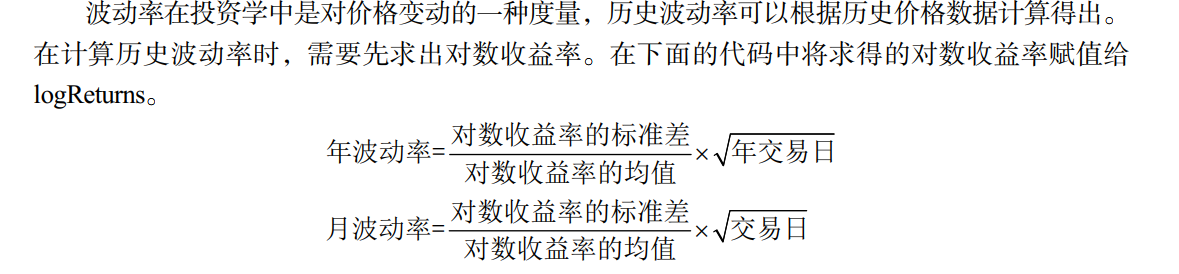

In [37]:
import numpy as np
params = dict(fname = "file/stock_data_bac.csv",
                 delimiter = ',',
                 usecols = 4,
                 skiprows=1)
closePrice = np.loadtxt(**params)

logReturns = np.diff(np.log(closePrice))
annual_volatility = logReturns.std()/logReturns.mean()*np.sqrt(252)
monthly_volatility = logReturns.std()/logReturns.mean()*np.sqrt(12)
print("年波动率",annual_volatility)
print("月波动率",monthly_volatility)


年波动率 609.4662535570384
月波动率 132.9964400212513


np.diff()函数实现每行的后一个值减去前一行的值。

### （7）股票统计分析。  
文件中的数据为给定时间范围内某股票的数据，现计算如下数据。  
① 获取该时间范围内交易日星期一、星期二、星期三、星期四、星期五分别对应的平均收盘价。  
② 平均收盘价最低、最高分别为星期几。  


In [38]:
import numpy as np
import datetime

def dateStr2num(s):
     s = s.decode("utf-8")
     return datetime.datetime.strptime(s, "%Y-%m-%d").weekday()

params = dict(fname = "file/stock_data_bac.csv",
                 delimiter = ',',
                 usecols = (0,4),   
                 skiprows=1,
                 converters = {0:dateStr2num},
                 unpack = True)

date, closePrice = np.loadtxt(**params)
average = []
for i in range(5):
     average.append(closePrice[date==i].mean())
     print("星期%d的平均收盘价为:" %(i+1), average[i])

print("\n平均收盘价最低是星期%d" %(np.argmin(average)+1))#最小值坐标
print("平均收盘价最高是星期%d" %(np.argmax(average)+1)) #最大值坐标


星期1的平均收盘价为: 28.408612447492242
星期2的平均收盘价为: 28.48590309714431
星期3的平均收盘价为: 28.401460158086454
星期4的平均收盘价为: 28.438666695488823
星期5的平均收盘价为: 28.457972921766675

平均收盘价最低是星期3
平均收盘价最高是星期2


说明：获取股票数据的模块较多，如tushare模块，tushare为了避免部分用户低门槛无限制地恶意调用数据，其tushare Pro接口开始引入积分制度，只有具备一定积分级别的用户才能调取相应的API。  
获取token凭证码操作步骤为：注册新用户，从头像上单击用户名，打开个人主页，再单击页面“接口TOKEN”选项，最后复制图标即可。
